In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [77]:
import tensorflow as tf

In [78]:
from keras.models import Sequential, Model
from keras.layers import Activation, LeakyReLU as LR, Dense, Dropout, Flatten, Reshape, Input
from keras.datasets import mnist

In [79]:
encoder = Sequential([
    Flatten(),
    Dropout(0.5),
    Dense(128),
    Dropout(0.5),
    Dense(64)
])

In [80]:
decoder = Sequential([
    Dense(64),
    Dense(128),
    Dropout(0.5),
    Dense(28*28),
    Activation('sigmoid'),
    Reshape((28,28))
])

In [81]:
((X_train,y_train),(X_test,y_test)) = mnist.load_data()

In [82]:
X_train = X_train/255.0
X_test = X_test/255.0

In [83]:
img = Input(shape=(28,28))

In [84]:
code = encoder(img)
reconstruction = decoder(code)

In [85]:
model = Model(inputs=img,outputs=reconstruction)

In [86]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

In [87]:
model.fit(X_train,X_train,epochs=50,validation_data=(X_test,X_test),batch_size=256)

Epoch 1/50
235/235 [==============================] - 5s 16ms/step - loss: 0.2632 - val_loss: 0.1749
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1916 - val_loss: 0.1545
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1829 - val_loss: 0.1480
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1794 - val_loss: 0.1438
Epoch 5/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1775 - val_loss: 0.1418
Epoch 6/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1764 - val_loss: 0.1405
Epoch 7/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1751 - val_loss: 0.1392
Epoch 8/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1744 - val_loss: 0.1396
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1739 - val_loss: 0.1381
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1735 - val_lo

In [88]:
predictions = model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


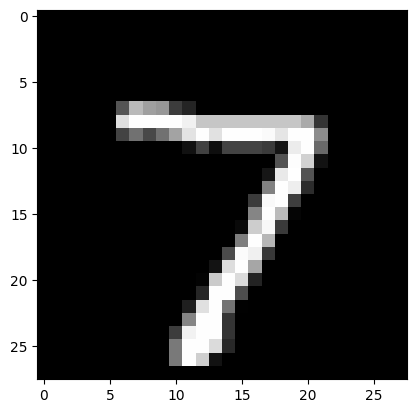

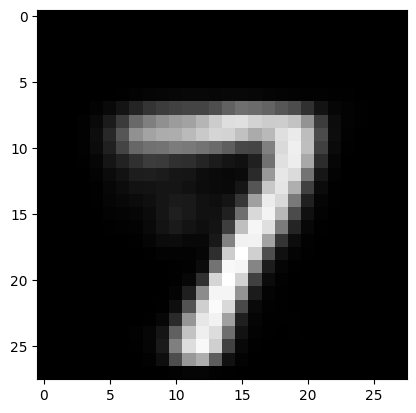

In [89]:
plt.imshow(X_test[0],cmap='gray')
plt.show()
plt.imshow(predictions[0],cmap='gray')
plt.show()

In [90]:
rando = Sequential([
    Dense(64),
    Dense(128),
    Dropout(0.5),
    Dense(28*28),
    Activation("sigmoid"),
    Reshape((28,28))
])

In [91]:
lcode = Input(shape=(64))
generation = rando(lcode)
randogen = Model(inputs=lcode,outputs=generation)

In [92]:
i_train = []
for x in range(len(X_train)):
    i_train.append(np.random.rand(64))
i_train = np.array(i_train)

In [93]:
randogen.compile(
    loss='binary_crossentropy',
    optimizer='adam'
)

In [94]:
randogen.fit(i_train,X_train,
             epochs=1,
             batch_size=256,
             )

235/235 [==============================] - 3s 10ms/step - loss: 0.2958


In [95]:
clones = decoder.predict([i_train])

1875/1875 [==============================] - 4s 2ms/step


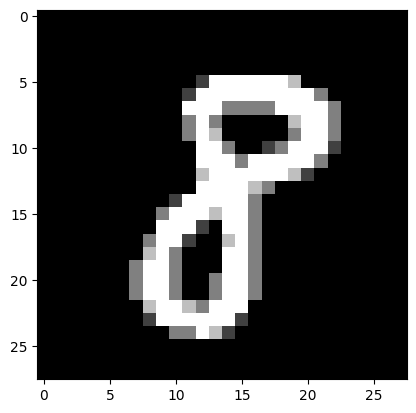

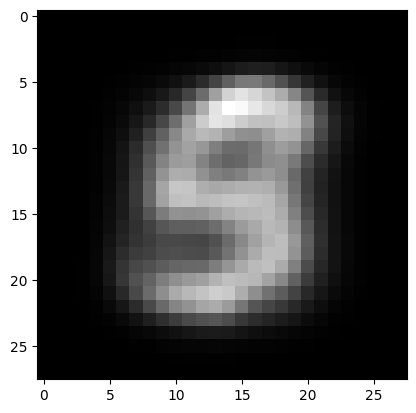

In [96]:
i = 245
plt.imshow(X_train[i],cmap='gray')
plt.show()
plt.imshow(clones[i],cmap='gray')
plt.show()

In [97]:
codes = encoder.predict([X_train])

1875/1875 [==============================] - 3s 1ms/step


In [98]:
encoder.save('encoder.h5')
decoder.save('decoder.h5')

with open('codes.dat','wb') as pf:
    pickle.dump(codes,pf)